In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import random
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:


df = image_dataset_from_directory(
    "my_dataset/",
    image_size = (28, 28),
    color_mode = "grayscale",
    label_mode = "int",
    shuffle = True
)

Found 620 files belonging to 26 classes.


In [3]:

X_all = []
y_all = []

for images, labels in df:
    X_all.append(images.numpy())
    y_all.append(labels.numpy())

X = np.concatenate(X_all)
y = np.concatenate(y_all)


In [4]:
X_train, y_train, X_test, y_test = X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train = X_train / 255.0 
X_test = X_test / 255.0 

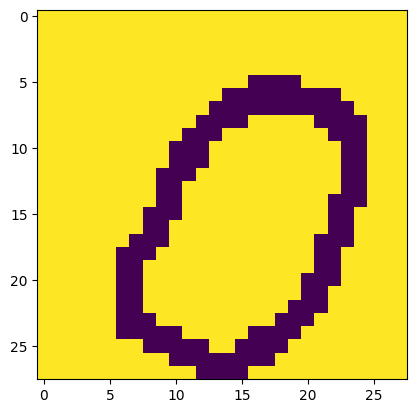

In [498]:
index = random.randint(0, len(y_test))
plt.imshow(X_test[index, : ])

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3, 3), input_shape = (28, 28, 1), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32,(3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32,(3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(26, activation = "sigmoid"))

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs = 150, validation_data= (X_test,y_test))

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0357 - loss: 3.2593 - val_accuracy: 0.0484 - val_loss: 3.2489
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0568 - loss: 3.2534 - val_accuracy: 0.0645 - val_loss: 3.2406
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0727 - loss: 3.2390 - val_accuracy: 0.0645 - val_loss: 3.2150
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0662 - loss: 3.2265 - val_accuracy: 0.0645 - val_loss: 3.2150
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0641 - loss: 3.2239 - val_accuracy: 0.0645 - val_loss: 3.1783
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0702 - loss: 3.1729 - val_accuracy: 0.0726 - val_loss: 3.1225
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0838 - loss: 3.0860 - val_accuracy: 0.0968 - val_loss: 3.0366
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0713 - loss: 3.0014 - val_accuracy: 0.1290 - 

In [515]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8663 - loss: 1.2476 


[0.928317666053772, 0.8870967626571655]

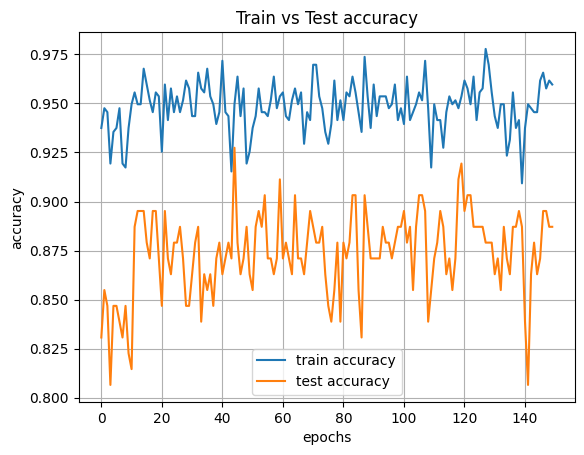

In [516]:
plt.plot(history.history["accuracy"], label = "train accuracy")
plt.plot(history.history["val_accuracy"], label = "test accuracy")
plt.title("Train vs Test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


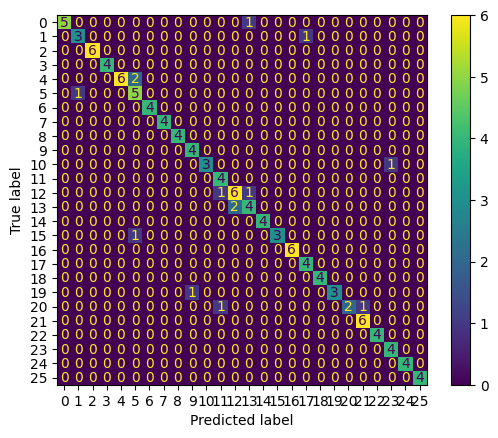

In [517]:
y_pred_probs = model.predict(X_test)  
y_pred_labels = np.argmax(y_pred_probs, axis=1)

if len(y_test.shape) > 1:
    y_true_labels = np.argmax(y_test, axis=1)
else:
    y_true_labels = y_test

cm = confusion_matrix(y_true_labels, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [9]:
model.save('my_model.h5')